In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.shape

(5110, 12)

In [ ]:
print(f"Total null count in BMI {df.shape[0]-4909}")

Total null count in BMI 201


In [ ]:
categorical_column_count = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status", "hypertension", "heart_disease", "stroke" ]
df[categorical_column_count].head(2)

,gender,ever_married,work_type,Residence_type,smoking_status,hypertension,heart_disease,stroke
0,Male,Yes,Private,Urban,formerly smoked,0,1,1
1,Female,Yes,Self-employed,Rural,never smoked,0,0,1


In [ ]:
## To find out unique categories in the column
df["stroke"].unique()

array([1, 0])

In [ ]:
numerical_colums = ["age", "avg_glucose_level", "bmi"]
df[numerical_colums].head(2)

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN


## Numerical column analysis[where columns has only number]

In [ ]:
# automatically detecting columns where only numbers are present
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Univariate Analysis. - Analysis of a single column at a time

## Count Plot

<Axes: xlabel='stroke', ylabel='count'>

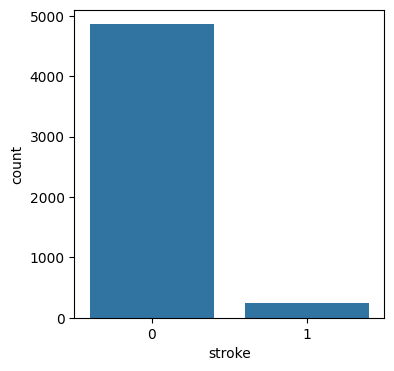

In [ ]:
## bar chart, countplot
plt.figure(figsize=(4, 4))
sns.countplot(x=df["stroke"])

### Interpretation of Results:

The target variable '**stroke**' is highly imbalanced with a lot more instances of class **0** (no stroke) than class **1** (stroke). This is an important observation as it will affect the choice of machine learning model and evaluation metric.

<Axes: xlabel='ever_married', ylabel='count'>

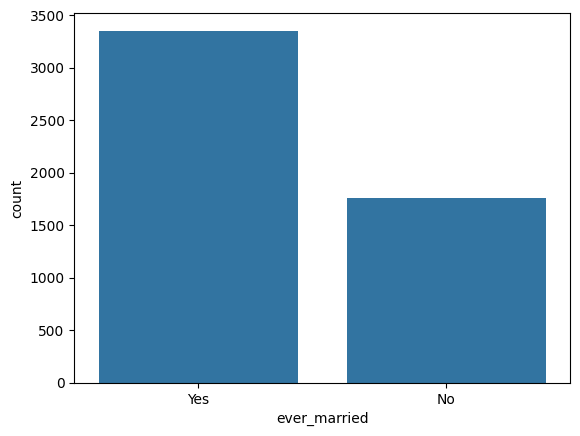

In [ ]:
sns.countplot(x=df["ever_married"])

## Bar chart

<Axes: xlabel='gender', ylabel='age'>

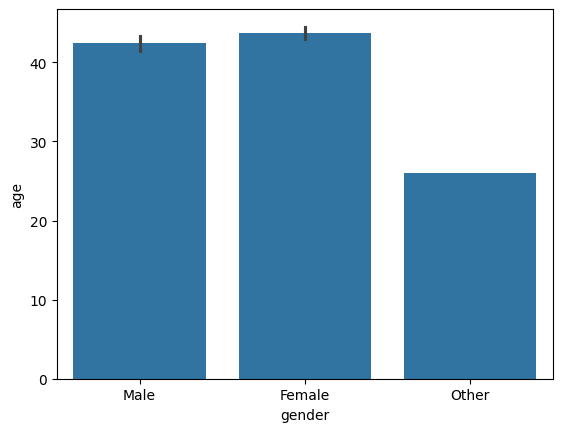

In [ ]:
## Bar chart - pass both x and y [what will y axis represent]

sns.barplot(x="gender", y="age", data=df) # [by default bar plot calculates mean value of y and plot that in y axis]

<Axes: xlabel='gender', ylabel='age'>

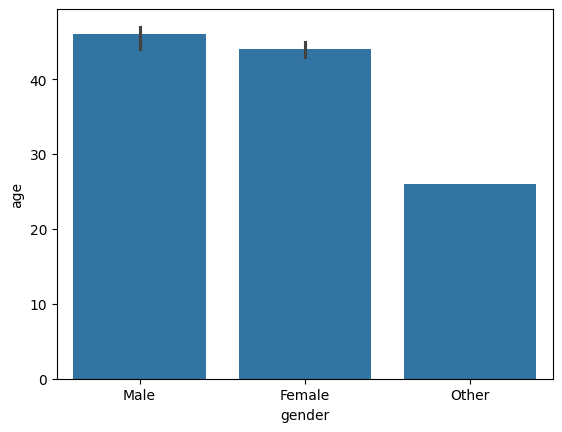

In [ ]:
sns.barplot(x="gender", y="age", data=df, estimator="median")

<Axes: xlabel='age', ylabel='bmi'>

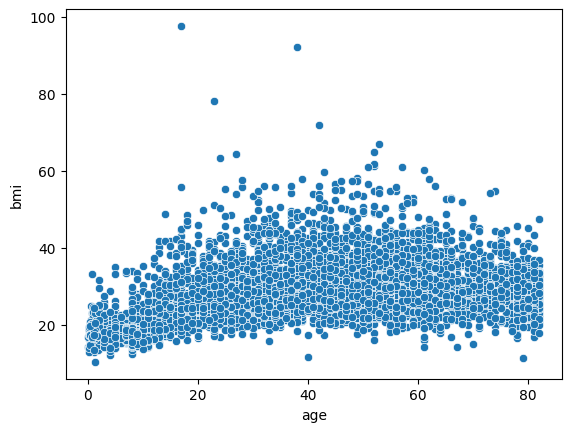

In [ ]:
sns.scatterplot(x="age", y="bmi", data=df)

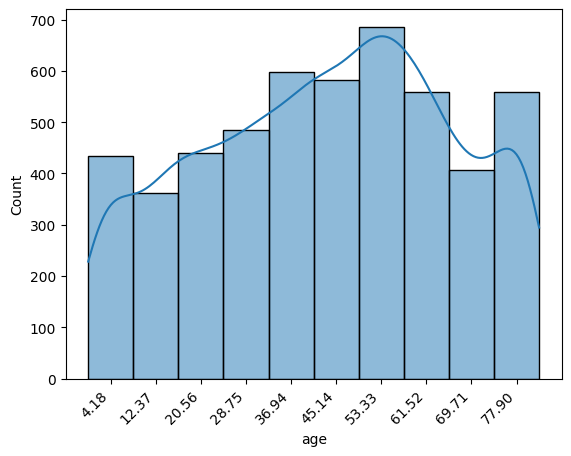

In [ ]:
import numpy as np
sns.histplot(df["age"], bins=10, kde = True)
bin_edges = np.histogram_bin_edges(df['age'], bins=10)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.xticks(bin_centers, rotation=45, ha='right')
plt.show()

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

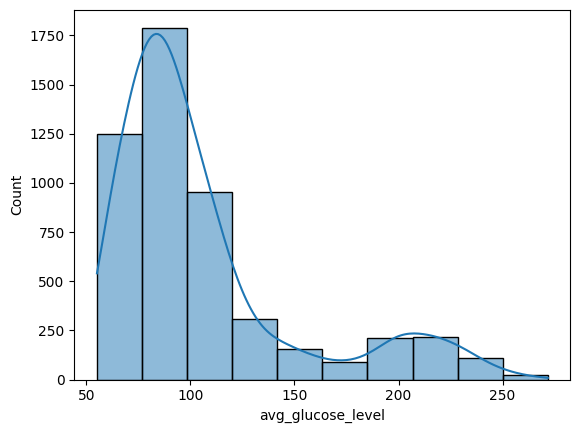

In [ ]:
sns.histplot(df["avg_glucose_level"], bins=10, kde = True)


<Axes: ylabel='avg_glucose_level'>

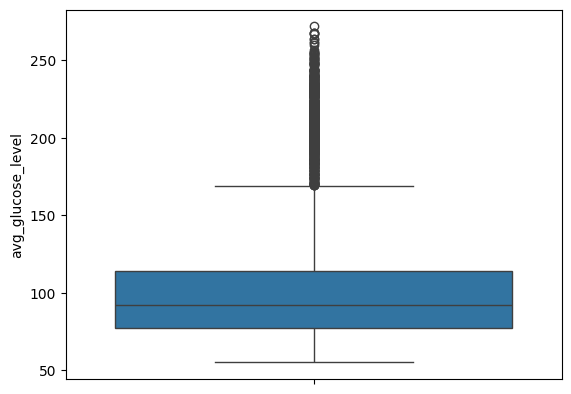

In [ ]:
sns.boxplot(df["avg_glucose_level"])

- The bottom most line is Lower Thereshold
- The 2nd line is Q1 -25%
- The 3rd line is Q2 - median
- 4th line is Q3 - 75%
- 5th line is Upper Thereshold

lower_th = Q1-1.5*IQR
upper_th = Q3+1.5*IQR

## Biavariate Analysis

<Axes: xlabel='gender', ylabel='count'>

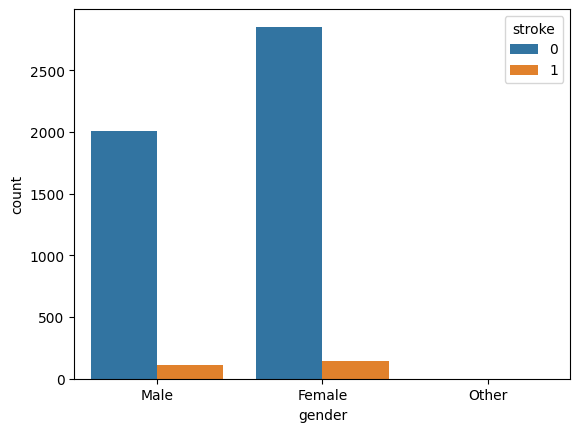

In [ ]:
+

In [ ]:
df["gender"].value_counts()

,count
gender,
Female,2994
Male,2115
Other,1


<Axes: xlabel='gender', ylabel='age'>

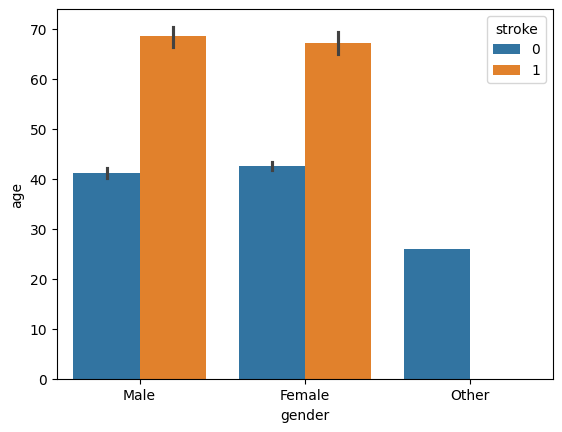

In [ ]:
sns.barplot(x=df["gender"], y=df["age"], hue=df["stroke"])

## Multivariate chart

In [ ]:
df[numerical_colums]

,age,avg_glucose_level,bmi
0,67.0,228.69,36.6
1,61.0,202.21,NaN
2,80.0,105.92,32.5
3,49.0,171.23,34.4
4,79.0,174.12,24.0
...,...,...,...
5105,80.0,83.75,NaN
5106,81.0,125.20,40.0
5107,35.0,82.99,30.6
5108,51.0,166.29,25.6


In [ ]:
corr_mat= df[numerical_colums].corr()
corr_mat

,age,avg_glucose_level,bmi
age,1.000000,0.238171,0.333398
avg_glucose_level,0.238171,1.000000,0.175502
bmi,0.333398,0.175502,1.000000


<Axes: >

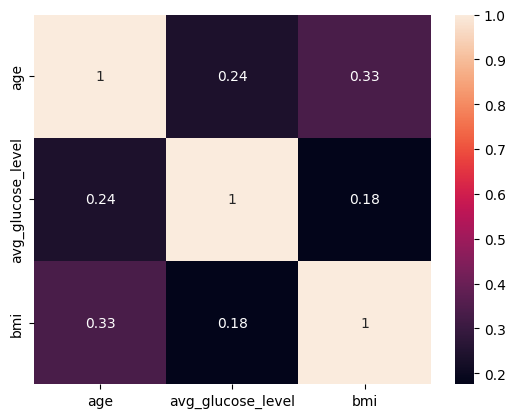

In [ ]:
sns.heatmap(corr_mat, annot=True)

In [ ]:
corr_mat= df[["age","hypertension",	"heart_disease"	,"avg_glucose_level"	,"bmi",	"stroke"]].corr()
corr_mat

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


<Axes: >

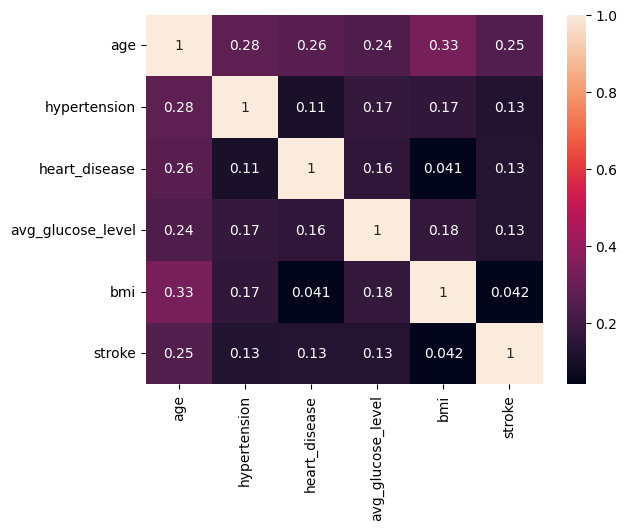

In [ ]:
sns.heatmap(corr_mat, annot=True)